

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>


### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Setup inicial: Importando as bibliotecas 

In [1]:
# Para manipualção de dados
import pandas as pd
import numpy as np

# Para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Para Machine learning
from sklearn.model_selection import train_test_split  # para dividir dados treino e teste
from sklearn.linear_model import LinearRegression # Treinar um modelo e fazer previsões, obter coef e intercpt
from sklearn import metrics # funções para avaliar modelos de machine learning.
from statsmodels.stats.diagnostic import het_breuschpagan # verificação de homocedasticidade
from statsmodels.formula.api import ols
from scipy.stats import shapiro # Verificar se é uma distribuição normal


import warnings
warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

## Fase 1: Compreendendo problema e Coleta de dados


In [2]:
# Vamos carregar os dados para analise
# Utilizaremos sep=';' para separar os dados
dados = pd.read_csv(r"C:\Users\init\Desktop\_\Tudo\Alura\DF pratica\860-Exercicio\Exercicio\dados\HousePrices_HalfMil.csv", sep=';')

In [3]:
# Visualização dos dados
dados

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


## Fase 2: Análise exploratíria dos dados(AED) 

Analise dos dados para primeiras informações

In [4]:
# Verificando o tamanho do dataset
dados.shape

(1000, 7)

In [5]:
# Verificando informações importantes do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   precos     1000 non-null   int64
 1   area       1000 non-null   int64
 2   garagem    1000 non-null   int64
 3   banheiros  1000 non-null   int64
 4   lareira    1000 non-null   int64
 5   marmore    1000 non-null   int64
 6   andares    1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB


*Notamos que não valores nulos no nosso df*

In [6]:
# Analise estatísticas descritivas
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


Variável Alvo (Y): preco

Variáveis Preditoras (X): area, garagem, banheiros, lareira, marmore, andares


### Analise gráfica

In [7]:
# Configurações para personalização da análises gráficas

#Palette
sns.set_palette("Set2")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("whitegrid")

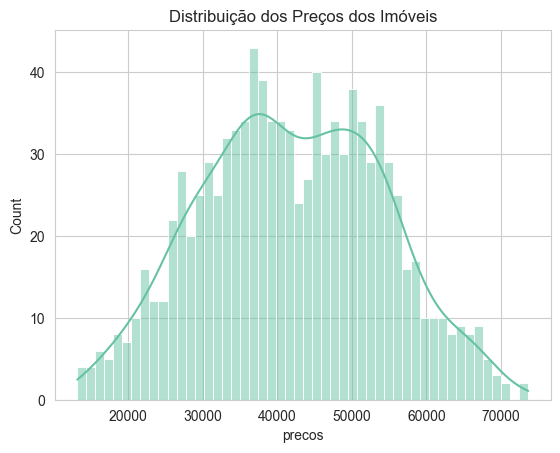

In [8]:
# Análise gráfica para investigar as relações nos dados.
# Análise Univariada - Distribuição do preço
# Utilizaremos o histograma para ver a distribuição da variavel alvo

sns.histplot(dados['precos'], kde=True, bins=50)
plt.title('Distribuição dos Preços dos Imóveis')
plt.show()

# Notamos que aparentemente se trata de uma  distribuição assimetrica a direita

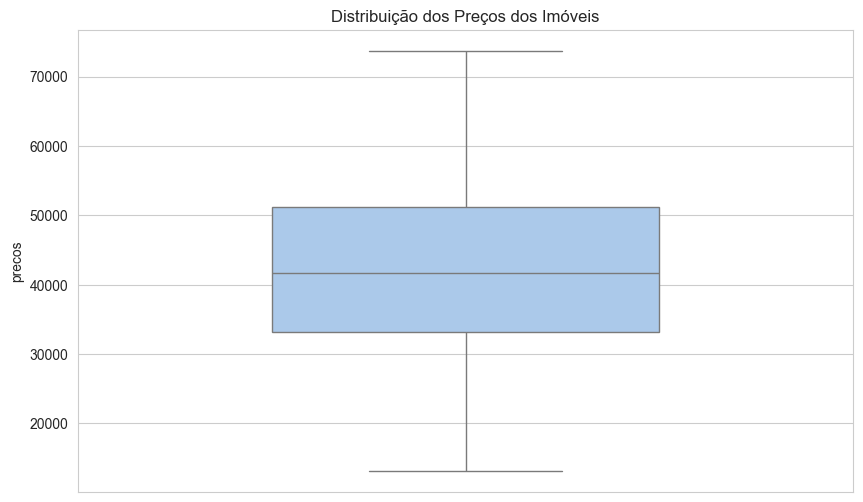

In [9]:
# Análise Boxplot para verificar se há outliers
ax = sns.boxplot(dados, y='precos', width=0.5, palette="pastel")
ax.figure.set_size_inches(10,6)
plt.title('Distribuição dos Preços dos Imóveis')
plt.show()

# Não temos outiliers

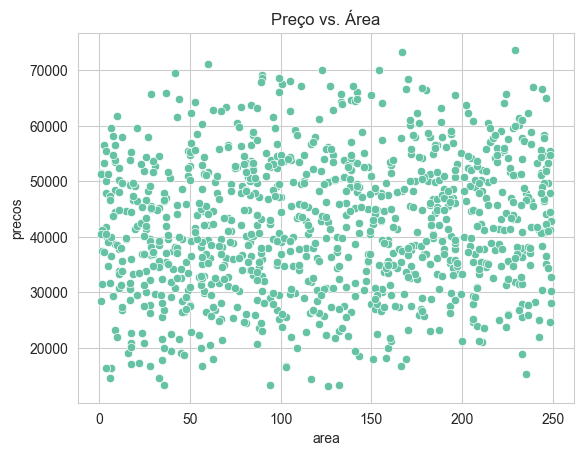

In [10]:
# Análise Bivariada - Área vs. Preço
ax = sns.scatterplot(x='area', y='precos', data=dados)
ax =sns.set_style('whitegrid')
plt.title('Preço vs. Área')
plt.show()

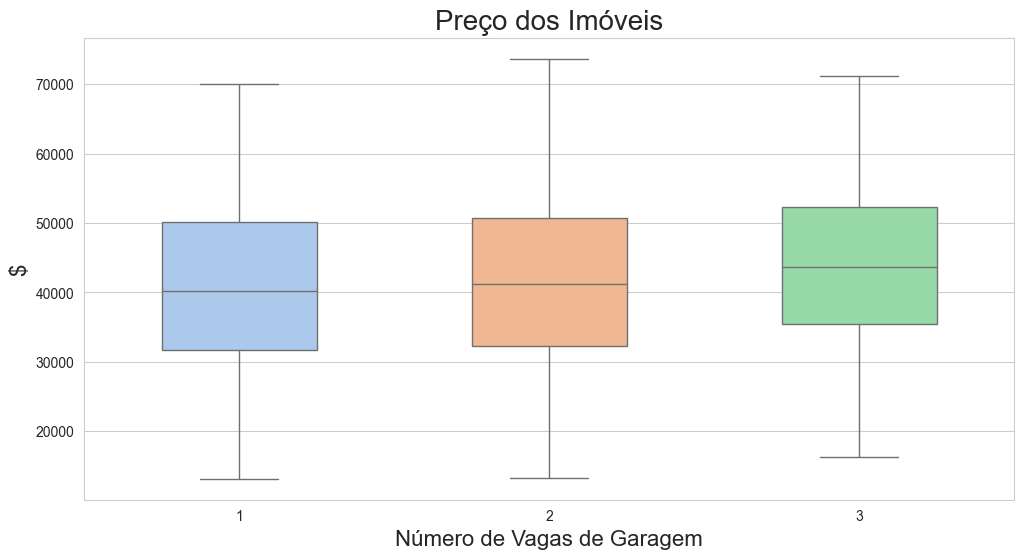

In [11]:
# Análise Bivariada - garagem vs. Preço
ax = sns.boxplot(y='precos', x='garagem', data=dados, orient='v', width=0.5, palette="pastel")
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Vagas de Garagem', fontsize=16)
plt.show()

# Temos uma leve percpeção de aumento nos preços com mais vagas de garagem

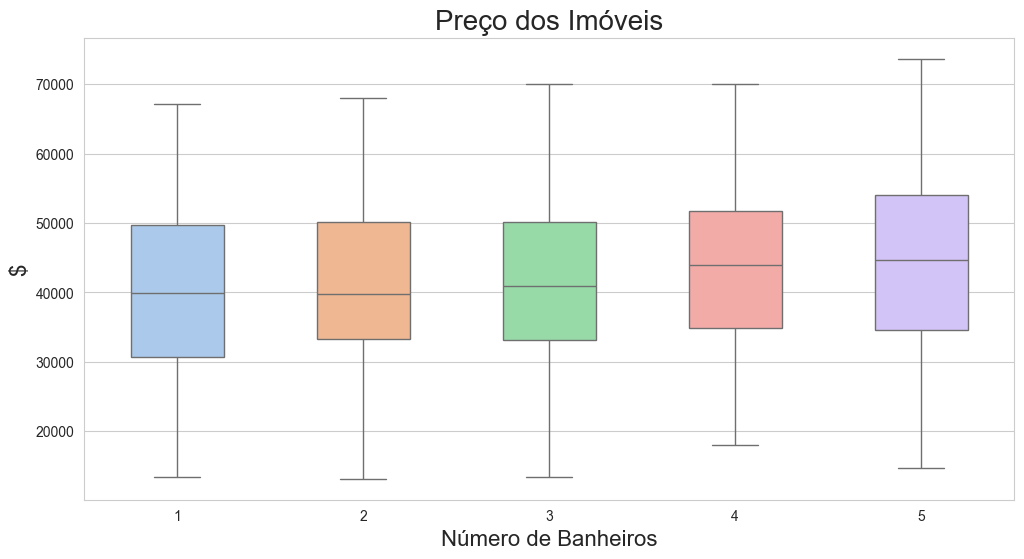

In [12]:
ax = sns.boxplot(y='precos', x='banheiros', data=dados, orient='v', width=0.5, palette="pastel")
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Banheiros', fontsize=16)
plt.show()

# Aqui entre 1 e 3 banheiros nao temos aumento revelantes nos preços

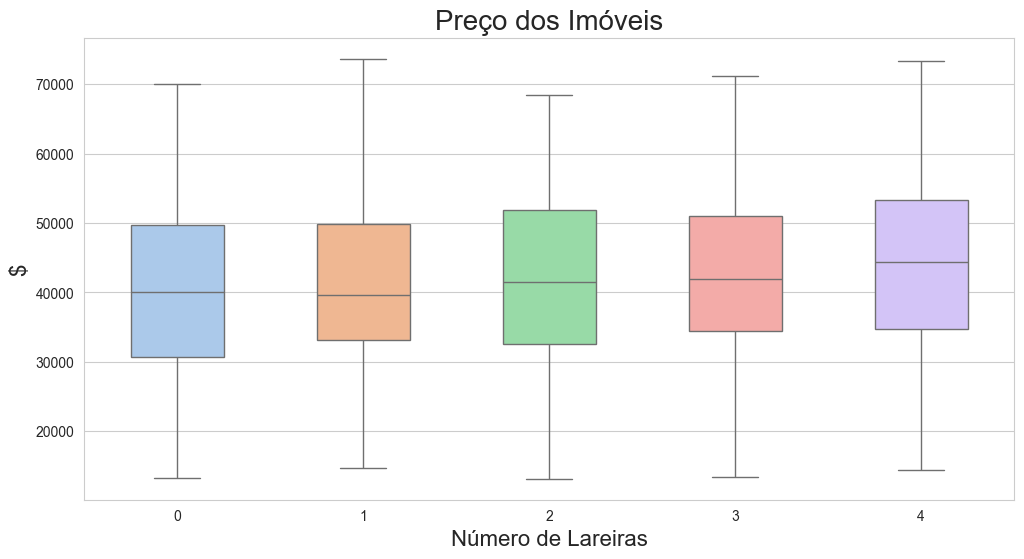

In [13]:
ax = sns.boxplot(y='precos', x='lareira', data=dados, orient='v', width=0.5, palette='pastel')
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Lareiras', fontsize=16)
plt.show()

# Notamos algo incomun onde  a partir 2 lareiras aumenta o valor e com 3 diminui

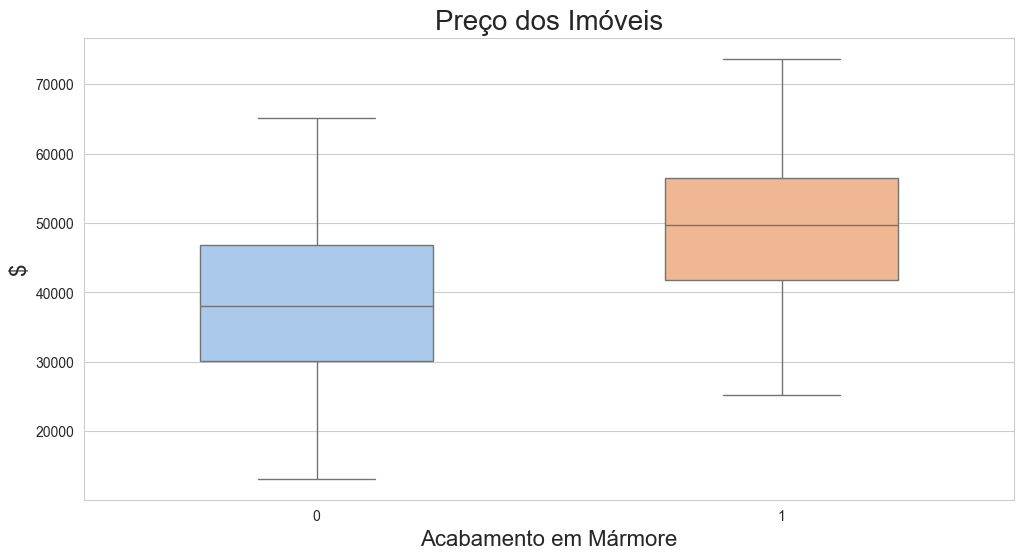

In [14]:
ax = sns.boxplot(y='precos', x='marmore', data=dados, orient='v', width=0.5, palette='pastel')
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Acabamento em Mármore', fontsize=16)
plt.show()


# Acabamento em mamore tem uma forte influencia nos preços

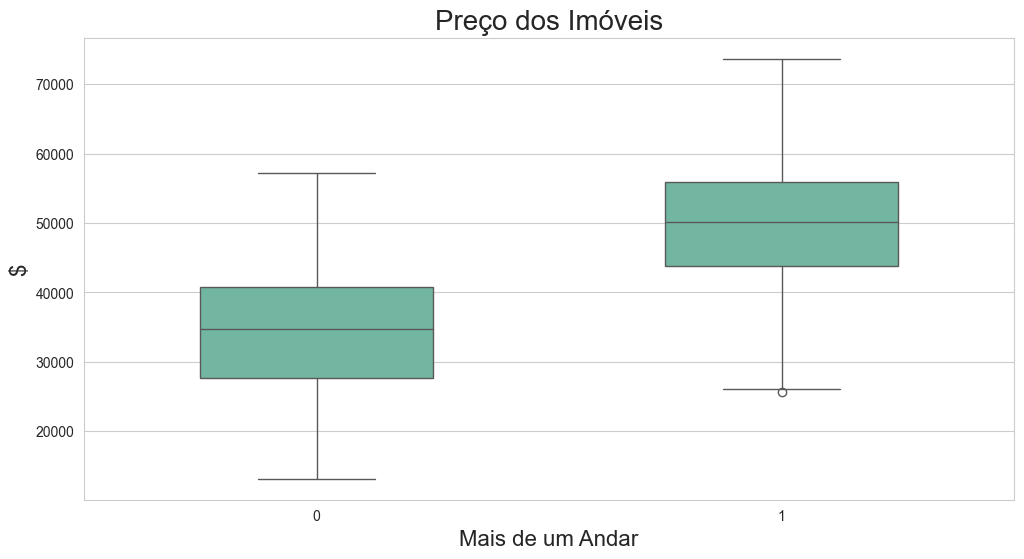

In [15]:
ax = sns.boxplot(y='precos', x='andares', data=dados, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Mais de um Andar', fontsize=16)
plt.show()

# Adição de andares aparentemente tem a maior relação de influencia no preço

## Fase 2.1: Correlações

investigando a relação entre as variáveis, principalmente como elas se correlacionam com os precos.

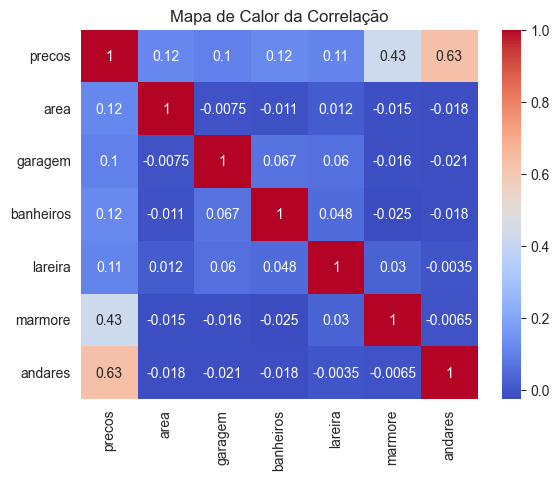

In [16]:
# Análise Multivariada - Matriz de Correlação
# Selecionamos apenas as colunas numéricas para o cálculo de correlação
corr_matrix = dados[['precos','area','garagem','banheiros','lareira','marmore','andares']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor da Correlação')
plt.show()

*Observamos que marmore e andares são as características mais correlacionadas com o preço.*

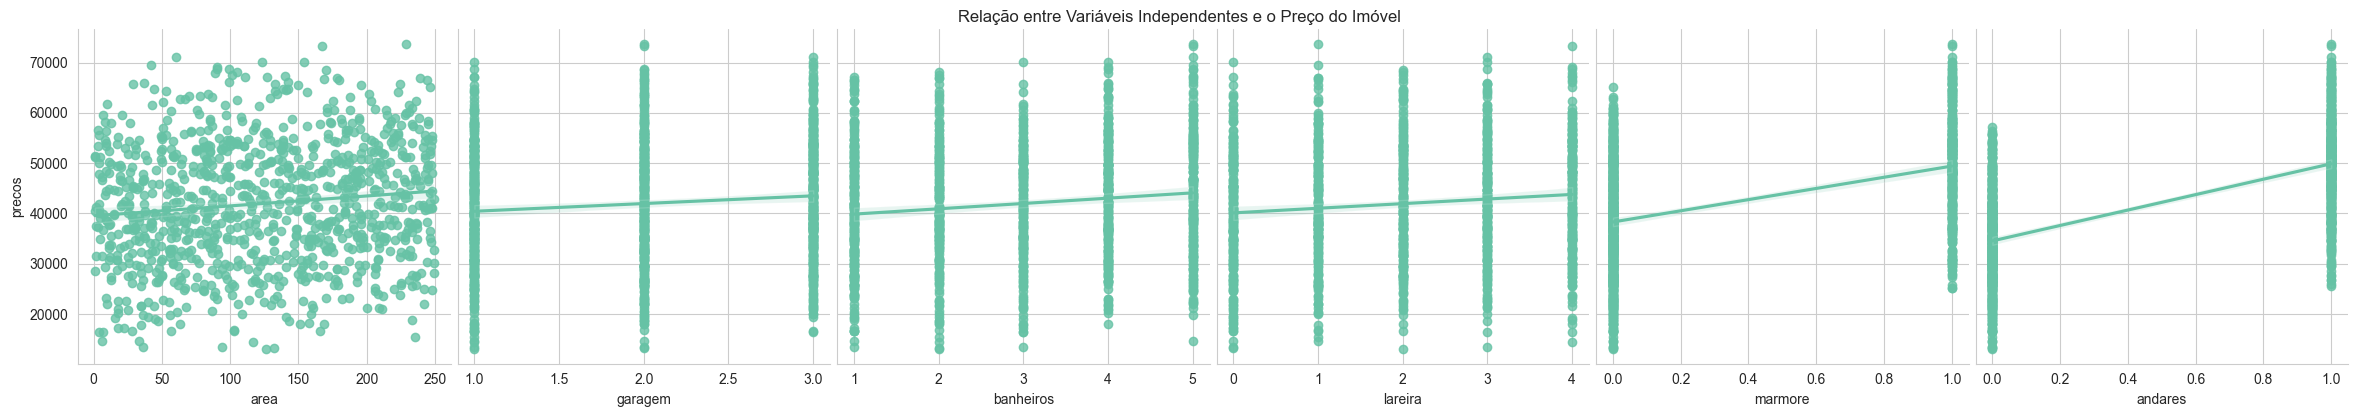

In [17]:
# Gráficos de Dispersão (pares de variáveis)
sns.pairplot(dados, x_vars=['area','garagem','banheiros','lareira','marmore','andares'], y_vars='precos', height=4, aspect=1, kind='reg')
plt.suptitle('Relação entre Variáveis Independentes e o Preço do Imóvel', y=1.02)
plt.show()

## Fase 3: Preparação dos dados 



In [18]:
# Divisão dos Dados em Treino e Teste
X = dados.drop('precos', axis=1) # Todas as colunas, exceto o alvo
y = dados['precos']             # Apenas a coluna alvo

In [19]:
# Criando os datasets de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [20]:
#  Checar multicolinearidade (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print("\nFatores de Inflação da Variância (VIF):")
print(vif.sort_values("VIF", ascending=False))



Fatores de Inflação da Variância (VIF):
     feature       VIF
1    garagem  4.999418
2  banheiros  4.271639
0       area  3.389439
3    lareira  2.885745
5    andares  1.722835
4    marmore  1.438704


VIF = 1: Não há correlação entre a variável e as outras. Este é o cenário ideal.

1 < VIF < 5: Correlação moderada. Geralmente, não é preocupante e é aceitável na maioria dos casos.

VIF > 5: Correlação potencialmente alta. É um sinal de alerta . Vale a pena investigar mais a fundo.

VIF > 10: Correlação muito alta. É um indicador claro de que a multicolinearidade é um problema sério no seu modelo e precisa ser corrigida.

## Fase 4: Construção e treinamento do modelo
Utilizaremos duas bibliotecas com foco diferente


*statsmodels.api.OLS*   inferência estatística. Fornece um resumo detalhado com p-valores, R-quadrado ajustado e etc..

*sklearn.linear_model.LinearRegression*: Focada em previsão e se integra perfeitamente ao ecossistema do Scikit-learn para pipelines de machine learning.


In [21]:
# Statsmodels para análise estatística detalhada
import statsmodels.api as sm

# Adicionar uma constante(intercept) ao modelo
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Criar e treinar o modelo OLS
modelo_sm = sm.OLS(y_train, X_train_sm).fit()

#Exibir o Resumo Estatístico completo
print(modelo_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 precos   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sat, 13 Sep 2025   Prob (F-statistic):          1.01e-145
Time:                        16:04:31   Log-Likelihood:                -7211.7
No. Observations:                 700   AIC:                         1.444e+04
Df Residuals:                     693   BIC:                         1.447e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.008e+04   1141.736     17.589      0.0

*Pontos importantes a serem observados*:

R-squared: Mede o quão bem o seu modelo explica os dados.


    R²= 62,9%, significa que 62% da variação da nos 'precos' podem ser explicados pelas variaveis preditoras


Prob (F-statistic): Mede se o seu modelo como um todo é estatisticamente significativo (se ele é útil). | 


    prob (F-statistic) < 0.05 rejeita a hipótese nula. Isso significa que o seu modelo como um todo é estatisticamente significativo


P>|t|: Mede se cada variável individual do seu modelo é estatisticamente significativa.


    p > 0.05 A variável é estatisticamente significativa. Você pode afirmar com confiança que ela tem uma associação com a variável dependente

In [22]:
# Scikit-learn para ml
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Criar e treinar modelo 
modelo_sk = LinearRegression()
modelo_sk.fit(X_train, y_train)

#Fazendo previsoes
y_previsto = modelo_sk.predict(X_test)

# Métricas de avaliação
intercepto = modelo_sk.intercept_
print(f"Intercepto (Ponto de Partida): R$ {intercepto:,.2f}")

# Verificando os coeficientes encontrados pelo modelo
coeficientes = pd.DataFrame(modelo_sk.coef_, X.columns, columns=['Coeficiente'])
print("\nCoeficientes do Modelo:")
print(coeficientes.round(2))


Intercepto (Ponto de Partida): R$ 20,082.30

Coeficientes do Modelo:
           Coeficiente
area             21.23
garagem        1581.38
banheiros      1207.63
lareira         759.06
marmore       11256.78
andares       15073.49


## Fase 5: Avaliação do modelo e Verificando premissas



R² (Coeficiente de Determinação) = 68.34%
MAE (Erro Absoluto Médio): R$ 6,051.93
RMSE (Raiz do Erro Quadrático Médio): R$ 7,189.59

INSIGHT: Nosso modelo explica aproximadamente 68.3% da variação no preço dos imóveis.


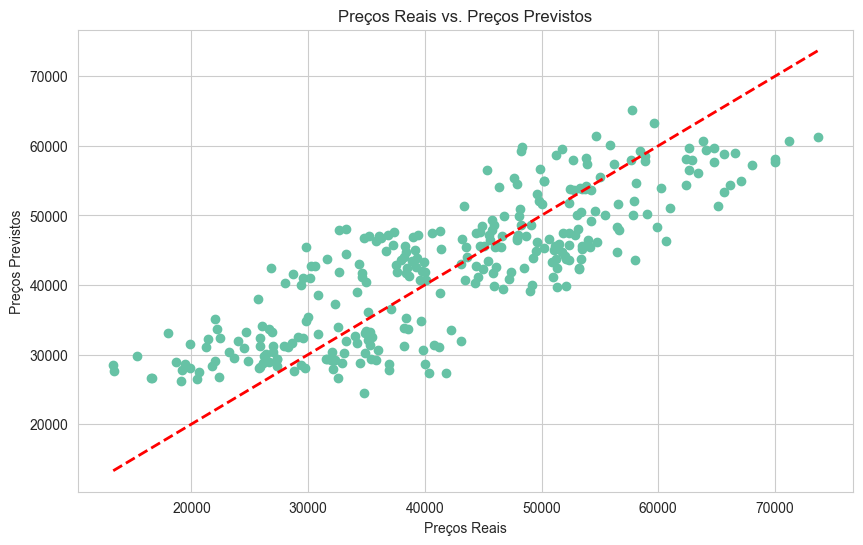

In [23]:
# 1. Métricas de Desempenho
r2 = r2_score(y_test, y_previsto)
mae = mean_absolute_error(y_test, y_previsto)
rmse = np.sqrt(mean_squared_error(y_test, y_previsto))

print(f'\nR² (Coeficiente de Determinação) = {metrics.r2_score(y_test, y_previsto)*100 :.2f}%')
print(f"MAE (Erro Absoluto Médio): R$ {mae:,.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): R$ {rmse:,.2f}")
print(f"\nINSIGHT: Nosso modelo explica aproximadamente {r2:.1%} da variação no preço dos imóveis.")

# 2. Avaliação Gráfica Preço real Vs Preço previsto
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_previsto)
plt.xlabel("Preços Reais")
plt.ylabel("Preços Previstos")
plt.title("Preços Reais vs. Preços Previstos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color="red")
plt.show()

## Fase 6: Analise do Resíduos

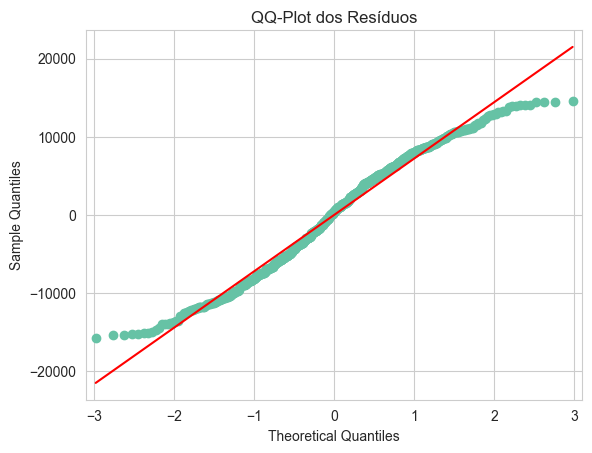

In [24]:
# 1. Análise de Resíduos
residuos = modelo_sm.resid

sm.qqplot(residuos, line='s')
plt.title("QQ-Plot dos Resíduos")
plt.show()

este padrão específico é um sinal clássico de Assimetria à Direita (Right Skew).

para confirma estatísticamente utilizaremos o Teste de Shapiro-Wilk

In [25]:
# teste de Normalidade dos resíduos
from scipy.stats import shapiro
stat, p_value = shapiro(residuos)
print("\nTeste Shapiro-Wilk (Normalidade dos resíduos):")
print(f"Estatística={stat:.4f}, p-valor={p_value:.4f}")

if p_value < 0.05:
     print('os dados NÃO seguem uma distribuição normal')
else:
       print('não há evidência estatística para dizer que os dados NÃO são normais.')


Teste Shapiro-Wilk (Normalidade dos resíduos):
Estatística=0.9784, p-valor=0.0000
os dados NÃO seguem uma distribuição normal


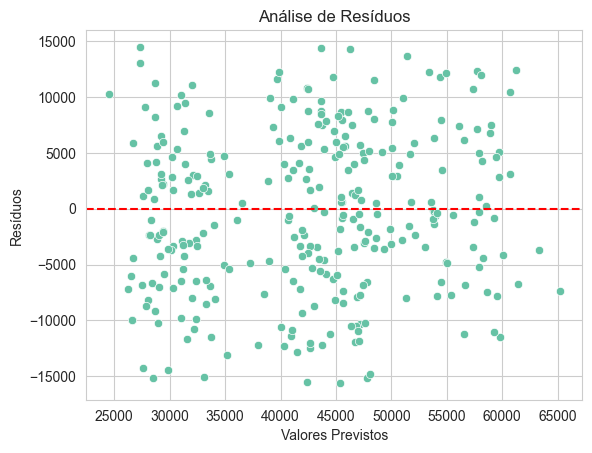


INSIGHT: A distribuição aleatória dos resíduos em torno da linha zero sugere que as suposições do modelo linear foram atendidas.


In [26]:
# Gráfico de Resíduos vs. Valores Previstos
residuos = y_test - y_previsto
sns.scatterplot(x=y_previsto, y=residuos)
ax.figure.set_size_inches(10,8)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Análise de Resíduos')
plt.show()

print("\nINSIGHT: A distribuição aleatória dos resíduos em torno da linha zero sugere que as suposições do modelo linear foram atendidas.")

In [27]:
# Teste de Breusch-Pagan
# Requer os resíduos e as variáveis explicativas (com constante).
# Retorna a estatística de Lagrange, o p-valor e outras estatísticas.

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.formula.api import ols

bp_test = het_breuschpagan(modelo_sm.resid, modelo_sm.model.exog)
labels = ['Estatística LM', 'P-valor LM', 'Estatística F', 'P-valor F']
bp_resultado = dict(zip(labels, bp_test))
alpha = 0.05
# Interpretação do p-valor
if bp_resultado['P-valor F'] > alpha:
    print("\nConclusão: A variância dos resíduos parece ser constante (Homocedasticidade - não rejeitamos H₀).")
else:
    print("\nConclusão: A variância dos resíduos não é constante (Heterocedasticidade - rejeitamos H₀).")


Conclusão: A variância dos resíduos parece ser constante (Homocedasticidade - não rejeitamos H₀).


## Fase 7: Conclusão e avaliação do modelo
*Interpretação*
Coeficiente de Determinação (R²): 0.68

O que é? Esta métrica indica a proporção da variância no preço dos imóveis que é explicada pelas características que usamos no modelo (andares, garagem, area, etc.).
Interpretação Técnica: Um R² de aproximadamente 68% significa que nosso modelo consegue explicar a maior parte da variabilidade dos preços, mas cerca de 32% da variação é causada por fatores que estão fora do nosso controle (ou seja, variáveis não incluídas no dataset). Do ponto de vista técnico, existe uma quantidade significativa de variância não explicada.


*Erro Absoluto Médio (MAE)*: ~R$ 6,051.93

O que é? É a média da diferença absoluta entre o preço real e o preço previsto pelo modelo.
Interpretação Técnica: Em média, cada previsão do nosso modelo erra em R$ 6,051.93, para mais ou para menos. Um erro médio dessa magnitude pode ser aceitável para uma estimativa inicial, mas é financeiramente relevante em uma transação real.


*Raiz do Erro Quadrático Médio (RMSE)*: ~R$ 7,189.59

O que é? É a raiz quadrada da média dos erros elevados ao quadrado.
Interpretação Técnica: O RMSE penaliza erros grandes de forma muito mais severa que o MAE. O fato de o nosso RMSE ser notavelmente maior que o MAE é um sinal importante: isso indica que, embora o erro médio seja de R$ 6,051.93, o modelo comete alguns erros significativamente grandes.


*Validade do Modelo (Análise de Resíduos)*
A análise do gráfico de resíduos mostrou uma dispersão aleatória dos pontos em torno da linha zero (homocedasticidade).

Interpretação Técnica: Isso é positivo e crucial. Confirma que as suposições do modelo de regressão linear foram atendidas. O modelo não possui um viés sistemático (por exemplo, ele não tende a subestimar consistentemente casas caras e superestimar casas baratas). Portanto, podemos confiar que as métricas de erro (MAE e RMSE) são representações fiéis da realidade do desempenho do modelo.

É um modelo razoavel para começar porém podemos perceber que tem varaiveis ocultas ( variaveis  essências para torna nosso modelo mais preciso).
Tendo em mente que se esse modelo fosse replicado ou escalado para decisões de alto risco, seria rejeidado pelo baixo Coeficiente de Determinação